<a href="https://colab.research.google.com/github/eroolpal/detect_damagecause/blob/master/Copy_of_firefloodearthfraudnew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

from fastai.vision import *

In [0]:
folder = 'fire'
file = 'urls_fire.csv'

In [0]:
path = Path('data/damage')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [47]:
from google.colab import files
uploaded = files.upload()

Saving firedamagedbuilding1.csv to firedamagedbuilding1.csv


In [0]:
!mv firedamagedbuilding1.csv data/damage/urls_fire.csv


In [0]:
classes = ['fire','flood','earthquake', 'fraud']

In [0]:
download_images(path/file, dest, max_pics=300)

In [0]:
folder = 'flood'
file = 'urls_flood.csv'

In [0]:
path = Path('data/damage')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [53]:
from google.colab import files
uploaded = files.upload()

Saving flooddamagedbuilding1.csv to flooddamagedbuilding1.csv


In [0]:
!mv flooddamagedbuilding1.csv data/damage/urls_flood.csv

In [0]:
classes = ['fire','flood','earthquake', 'fraud']

In [0]:
download_images(path/file, dest, max_pics=300)

In [0]:
folder = 'earthquake'
file = 'urls_earthquake.csv'

In [0]:
path = Path('data/damage')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [16]:
from google.colab import files
uploaded = files.upload()

Saving earthquakedamagedbuilding.csv to earthquakedamagedbuilding.csv


In [0]:
!mv earthquakedamagedbuilding.csv data/damage/urls_earthquake.csv

In [0]:
classes = ['fire','flood','earthquake', 'fraud']

In [0]:
download_images(path/file, dest, max_pics=300)

In [0]:
folder = 'fraud'
file = 'urls_fraud.csv'

In [0]:
path = Path('data/damage')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [23]:
from google.colab import files
uploaded = files.upload()

Saving housegood.csv to housegood.csv


In [0]:
!mv housegood.csv data/damage/urls_fraud.csv

In [0]:
classes = ['fire','flood','earthquake', 'fraud']

In [0]:
download_images(path/file, dest, max_pics=300)

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

In [0]:

np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [59]:
data.classes

['earthquake', 'fire', 'flood', 'fraud']

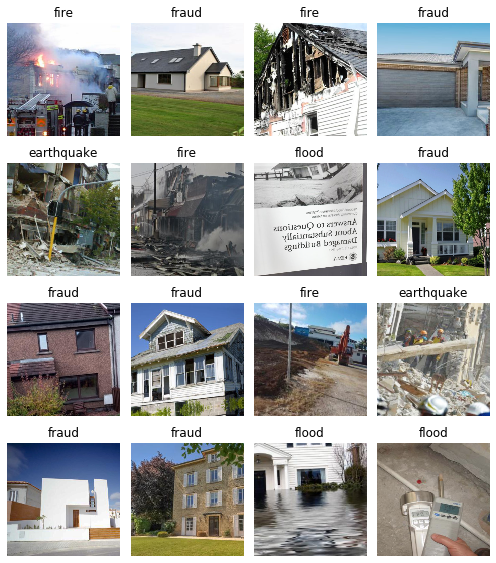

In [63]:
data.show_batch(rows=4, figsize=(7,8))

In [64]:

data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['earthquake', 'fire', 'flood', 'fraud'], 4, 904, 226)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [66]:
#defaults.device= torch.device('gpu')
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.935372,1.198055,0.362832,00:17
1,1.481965,0.866998,0.296460,00:17
2,1.216303,0.884655,0.269911,00:17
3,1.032355,0.876711,0.287611,00:16


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [69]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


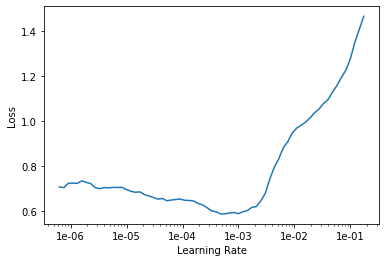

In [70]:
learn.recorder.plot()

In [71]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.737008,0.839628,0.278761,00:18
1,0.619396,0.786207,0.261062,00:17


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

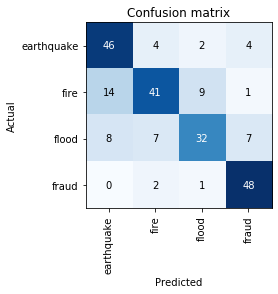

In [75]:

interp.plot_confusion_matrix()

Clean up the text

In [0]:
from fastai.widgets import *

In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [0]:
#ImageCleaner(ds, idxs, path, duplicates=True)

Putting your model in production

In [0]:

learn.export()

In [0]:

defaults.device = torch.device('cpu')

In [0]:
from google.colab import files
uploaded = files.upload()

Saving earthquake_house.jpg to earthquake_house.jpg


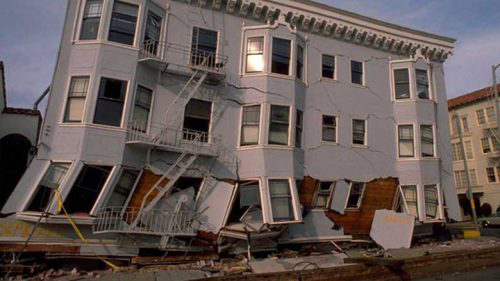

In [0]:
img = open_image('earthquake_house.jpg')
img

In [0]:

learn = load_learner(path)

In [0]:

pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category earthquake